# **Dataset Information**

- Source: **IBM Cognos Analytics Sample Data**

- Size: **7,043 rows × 21 columns**


# **Customer Demographics**:
- **customerID**: Unique identifier
- **gender**: Male/Female
- **SeniorCitizen**: 0 (No), 1 (Yes)
- **Partner**: Yes/No (has partner)
- **Dependents**: Yes/No (has dependents)

# **Service Information**:
- **tenure**: Number of months with company
- **PhoneService**: Yes/No
- **MultipleLines**: Yes/No/No phone service
- **InternetService**: DSL/Fiber optic/No
- **OnlineSecurity**: Yes/No/No internet service
- **OnlineBackup**: Yes/No/No internet service
- **DeviceProtection**: Yes/No/No internet service
- **TechSupport**: Yes/No/No internet service
- **StreamingTV**: Yes/No/No internet service
- **StreamingMovies**: Yes/No/No internet service

# **Account Information**:
- **Contract**: Month-to-month/One year/Two year
- **PaperlessBilling**: Yes/No
- **PaymentMethod**: Electronic check/Mailed check/Bank transfer (automatic)/Credit card (automatic)
- **MonthlyCharges**: Monthly bill amount
- **TotalCharges**: Total amount charged
- **Churn**: TARGET VARIABLE - Yes (churned), No (retained)

# **Imports**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# **Loading data**

In [2]:
df = pd.read_csv('IBM_data.csv')

# **Part 1: Project Implementation**

## **1. Data Preprocessing**

### **Task 1: Data Cleaning Pipeline**

#### **Task 1.1 Data Quality Issues**

##### **1. Missing values in TotalCharges column**

In [3]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

median_value = df['TotalCharges'].median()
df['TotalCharges'] = df['TotalCharges'].fillna(median_value)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


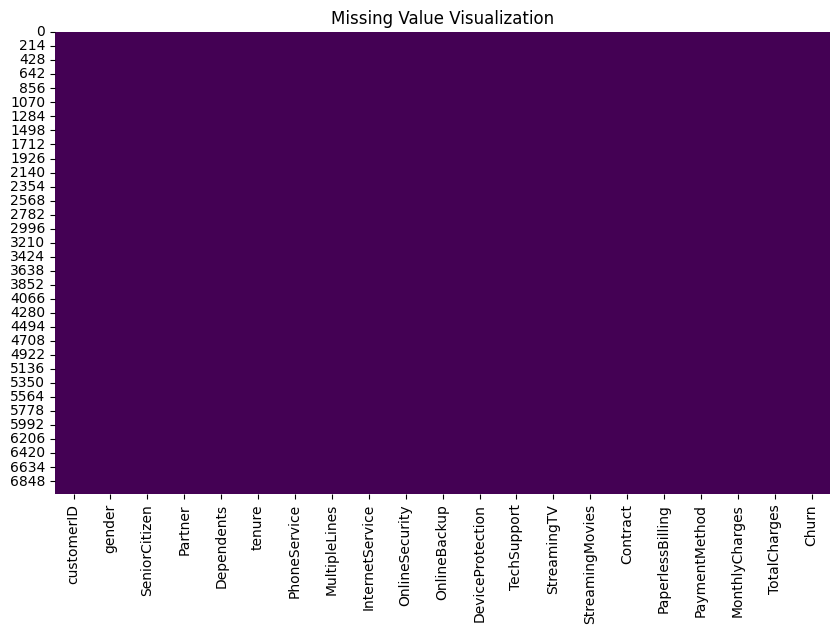

In [5]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Value Visualization')
plt.show()

##### **2. Inconsistent data types**

In [6]:
cols_with_no_service = [
    'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
    'DeviceProtection', 'TechSupport',
]
for col in cols_with_no_service:
    df[col] = df[col].replace({'No internet service': 'No'})

df['MultipleLines'] = df['MultipleLines'].replace({'No phone service': 'No'})

In [7]:
df = df.drop(columns=['customerID'])

#### **Task 1.2: Feature Engineering**

##### **1. Tenure-based features**

In [8]:
df["Tenure Customer"] = df["tenure"].apply(lambda x: "newcustomer" if x < 10 else "oldcustomer")
df["Tenure Group"] = pd.cut(df["tenure"], bins=[0, 14, 24, 40, 50, 60, 72], labels=["0-14", "15-24", "25-40", "41-50", "51-60", "61-72"])

##### **2. Service bundling features**

In [9]:
service_cols = [
    'PhoneService', 'MultipleLines','DeviceProtection',
    'TechSupport','OnlineSecurity', 'OnlineBackup',
]
df["Total-services"] = df[service_cols].apply(lambda x: sum(x == 'Yes'), axis=1)

premium_cols = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport']
df["Premium Services"] = df[premium_cols].apply(lambda x: sum(x == 'Yes'), axis=1)

##### **3. Financial features**

In [10]:
df["Average Charges"] = df["TotalCharges"] / df["tenure"].replace(0, 1)
df["Price Per Service"] = df["TotalCharges"] / df["Total-services"].replace(0, 1)

##### **4. Risk factors**

In [11]:
df["Payment Risk"] = df["PaymentMethod"].apply(lambda x: "High Risk" if x in ["Bank transfer (automatic)", "Credit card (automatic)"] else "Low Risk")

df["Contract Risk"] = df["Contract"].apply(lambda x: "High Risk" if x == "Month-to-month" else "Low Risk")

## **2. Exploratory Data Analysis**

### **Task 2.1: Comprehensive EDA Report**

#### **1. Statistical Analysis**

##### **1. Descriptive statistics for all variables**

In [12]:
descriptive_stats = df.describe(include='all')
descriptive_stats

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TotalCharges,Churn,Tenure Customer,Tenure Group,Total-services,Premium Services,Average Charges,Price Per Service,Payment Risk,Contract Risk
count,7043,7043.000000,7043,7043,7043.000000,7043,7043,7043,7043,7043,...,7043.000000,7043,7043,7032,7043.000000,7043.000000,7043.000000,7043.000000,7043,7043
unique,2,NaN,2,2,NaN,2,2,3,2,2,...,NaN,2,2,6,NaN,NaN,NaN,NaN,2,2
top,Male,NaN,No,No,NaN,Yes,No,Fiber optic,No,No,...,NaN,No,oldcustomer,0-14,NaN,NaN,NaN,NaN,Low Risk,High Risk
freq,3555,NaN,3641,4933,NaN,6361,4072,3096,5024,4614,...,NaN,5174,5189,2360,NaN,NaN,NaN,NaN,3977,3875
mean,NaN,0.162147,NaN,NaN,32.371149,NaN,NaN,NaN,NaN,NaN,...,2281.916928,NaN,NaN,NaN,2.590657,1.265654,66.880842,776.714703,NaN,NaN
std,NaN,0.368612,NaN,NaN,24.559481,NaN,NaN,NaN,NaN,NaN,...,2265.270398,NaN,NaN,NaN,1.503988,1.286879,60.660378,617.917282,NaN,NaN
min,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,...,18.800000,NaN,NaN,NaN,0.000000,0.000000,13.775000,12.000000,NaN,NaN
25%,NaN,0.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,...,402.225000,NaN,NaN,NaN,1.000000,0.000000,36.255000,246.966667,NaN,NaN
50%,NaN,0.000000,NaN,NaN,29.000000,NaN,NaN,NaN,NaN,NaN,...,1397.475000,NaN,NaN,NaN,2.000000,1.000000,70.450000,696.800000,NaN,NaN
75%,NaN,0.000000,NaN,NaN,55.000000,NaN,NaN,NaN,NaN,NaN,...,3786.600000,NaN,NaN,NaN,4.000000,2.000000,90.285826,1170.870833,NaN,NaN


##### **2. Correlation analysis between numerical variables**

In [13]:
numeric_df = df.select_dtypes(include=['number'])
correlation_matrix = numeric_df.corr(method='spearman')
correlation_matrix

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Total-services,Premium Services,Average Charges,Price Per Service
SeniorCitizen,1.000000,0.018556,0.221067,0.107256,0.072833,0.027174,0.216073,0.103035
tenure,0.018556,1.000000,0.276417,0.886998,0.520928,0.475579,0.267044,0.879606
MonthlyCharges,0.221067,0.276417,1.000000,0.637475,0.710456,0.579783,0.986611,0.425043
TotalCharges,0.107256,0.886998,0.637475,1.000000,0.738515,0.664478,0.635656,0.888670
Total-services,0.072833,0.520928,0.710456,0.738515,1.000000,0.892335,0.706220,0.376482
Premium Services,0.027174,0.475579,0.579783,0.664478,0.892335,1.000000,0.576335,0.343794
Average Charges,0.216073,0.267044,0.986611,0.635656,0.706220,0.576335,1.000000,0.426312
Price Per Service,0.103035,0.879606,0.425043,0.888670,0.376482,0.343794,0.426312,1.000000


#### **2. Visualizations**

##### **1. Distribution plots for numerical variables**

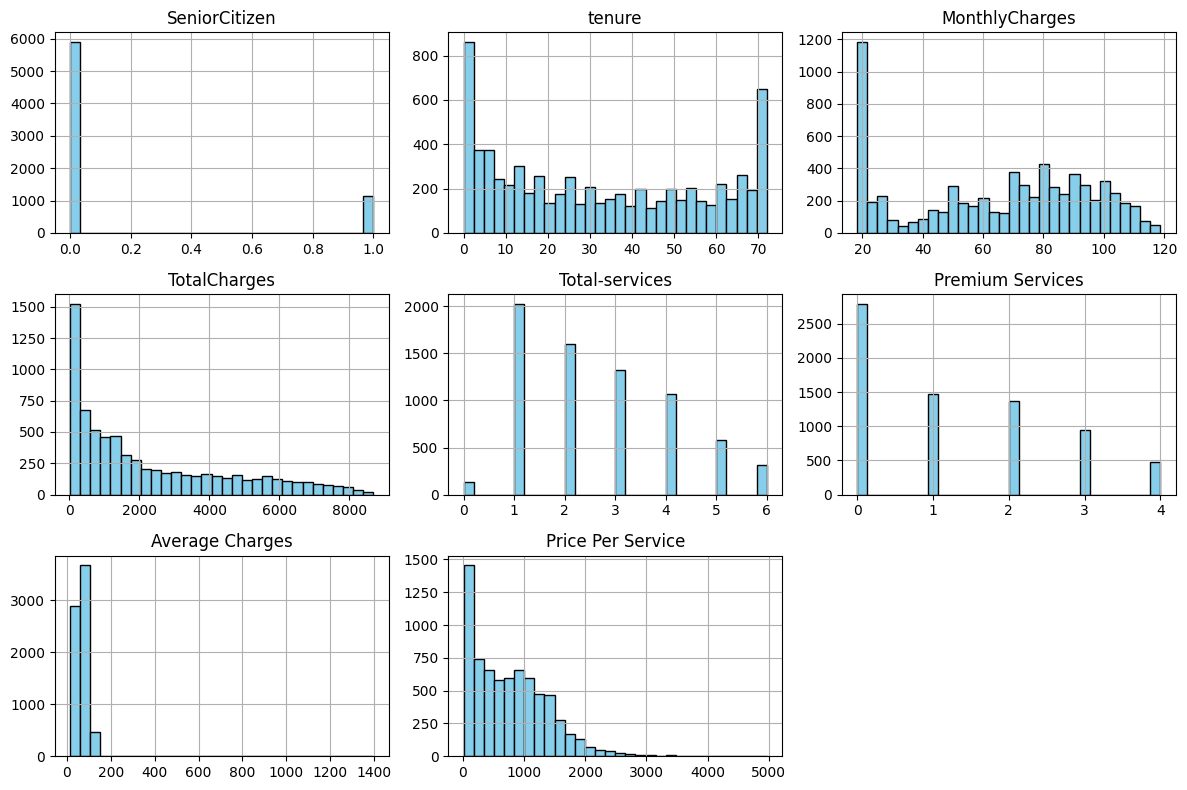

In [14]:
numeric_df.hist(bins=30, color='skyblue', edgecolor='black', figsize=(12, 8))
plt.tight_layout()
plt.show()

##### **2. Count plots for categorical variables**

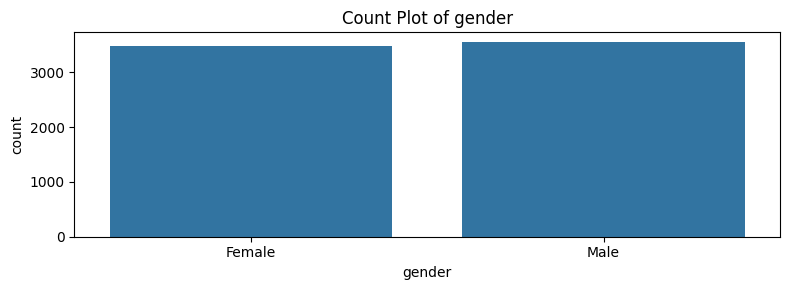

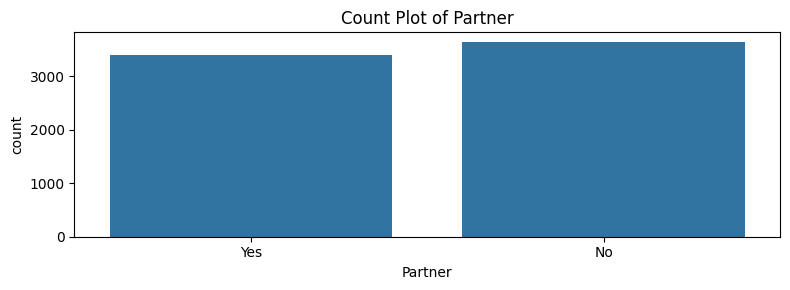

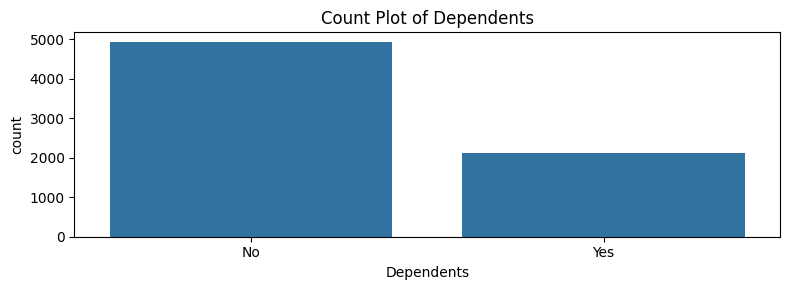

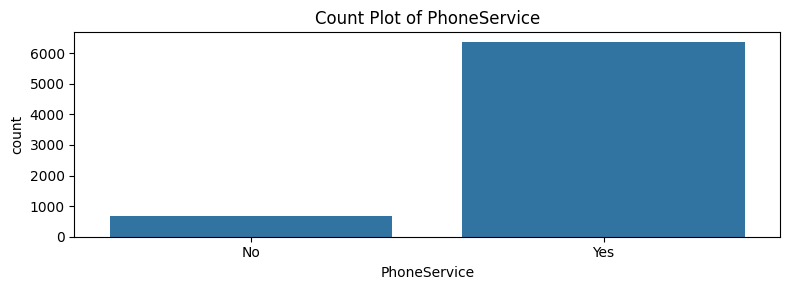

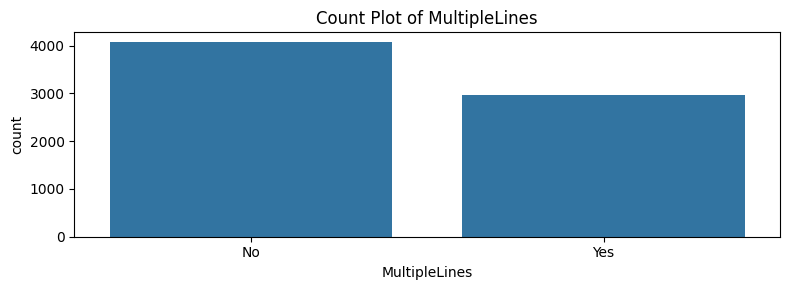

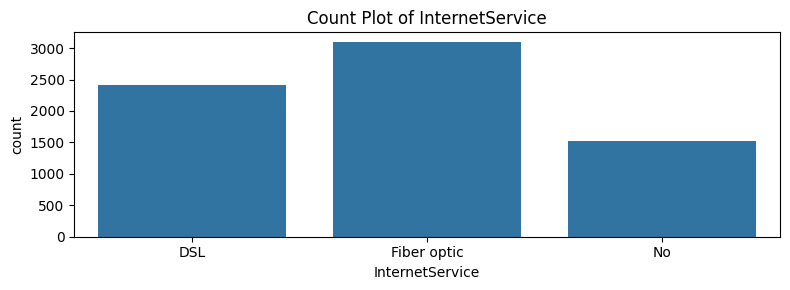

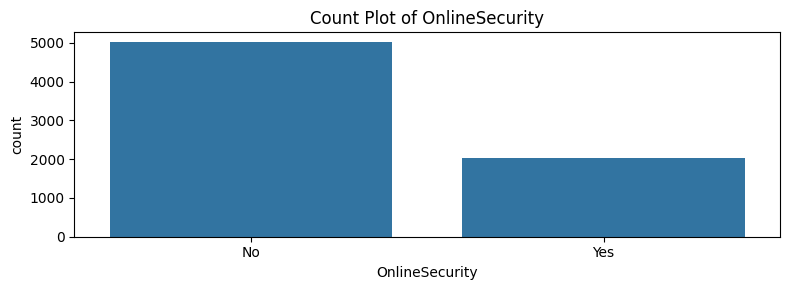

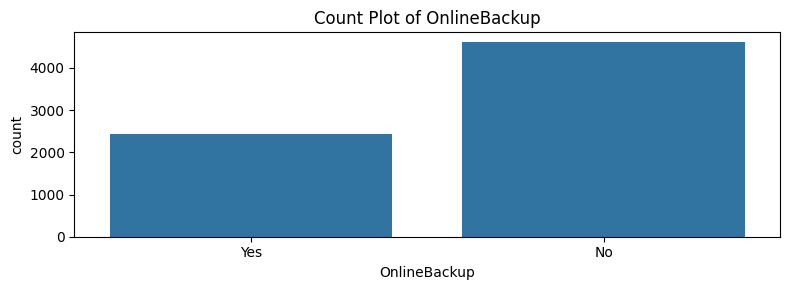

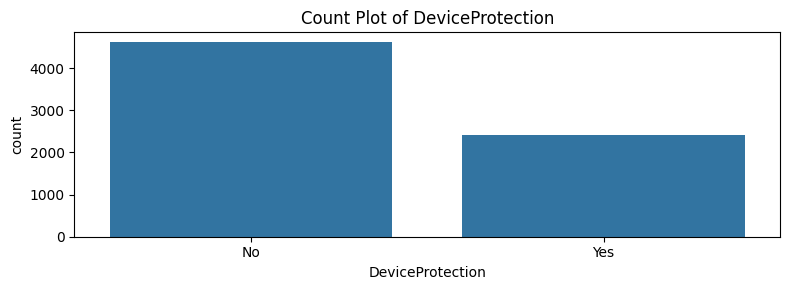

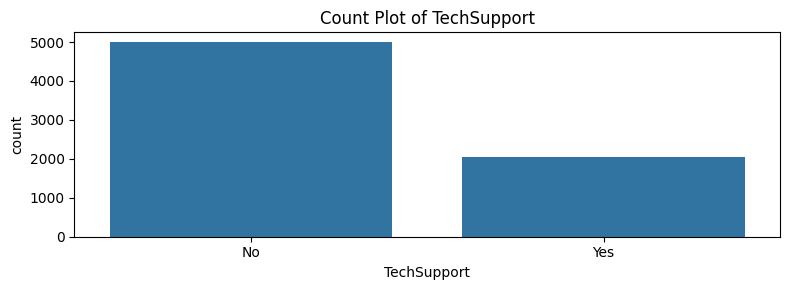

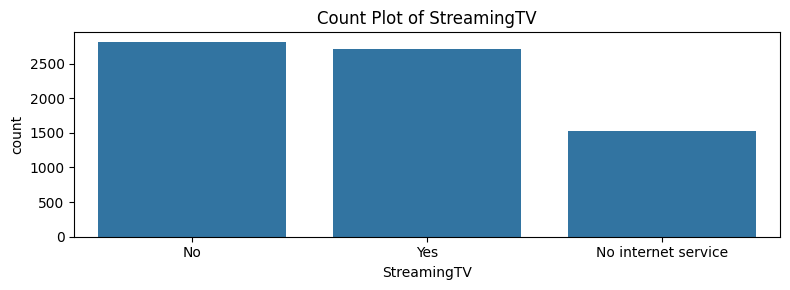

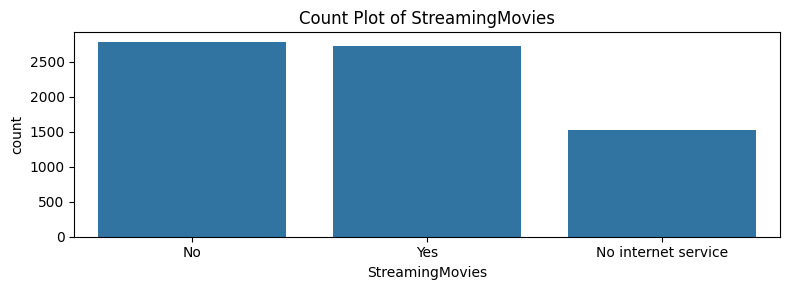

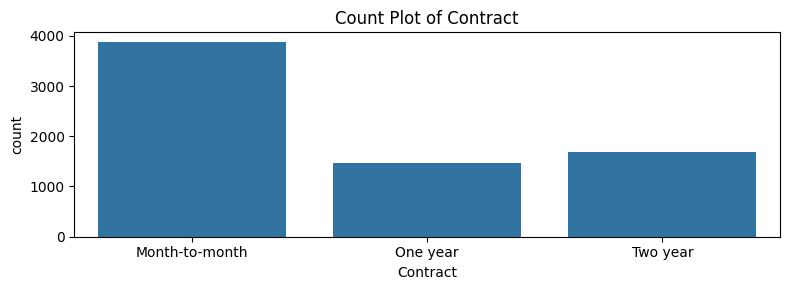

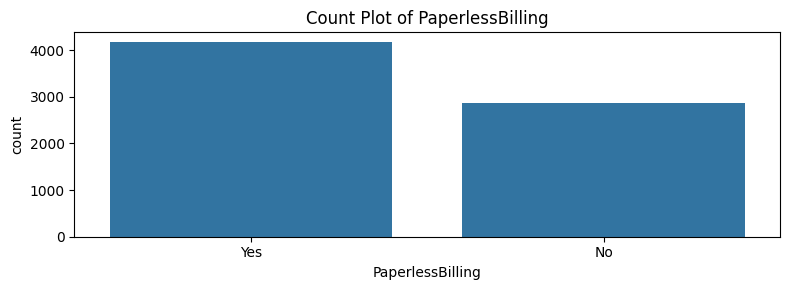

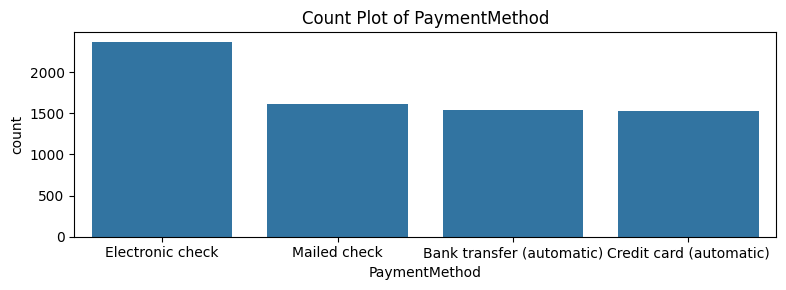

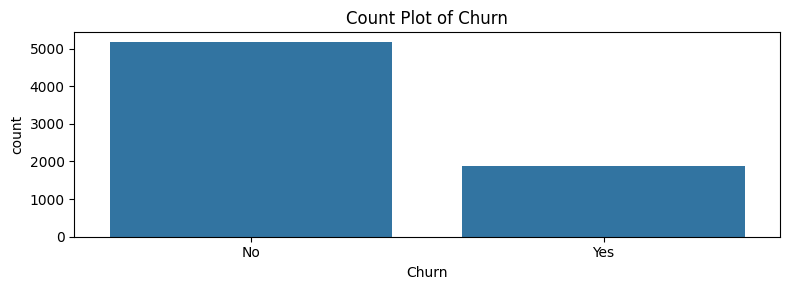

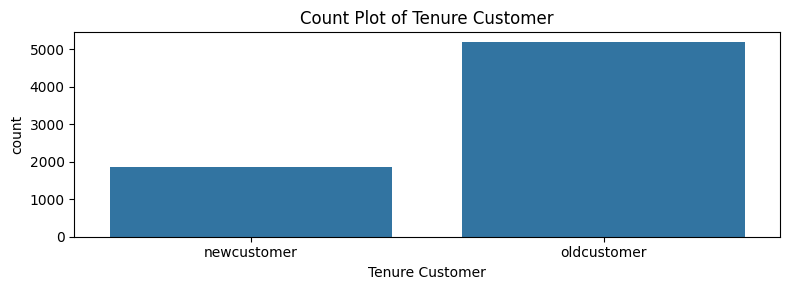

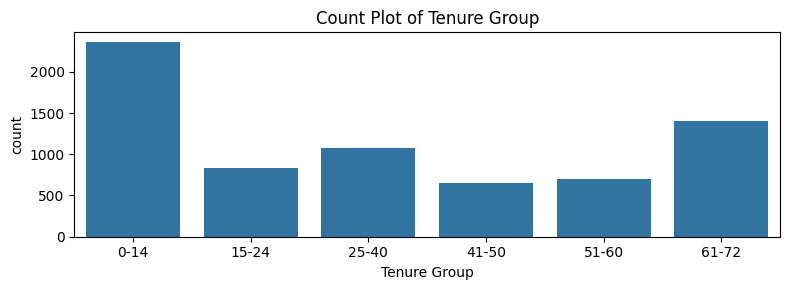

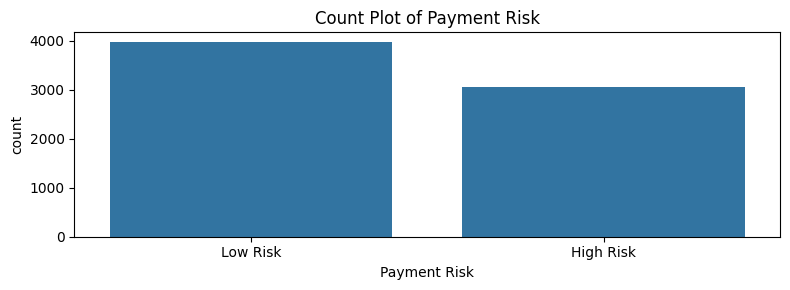

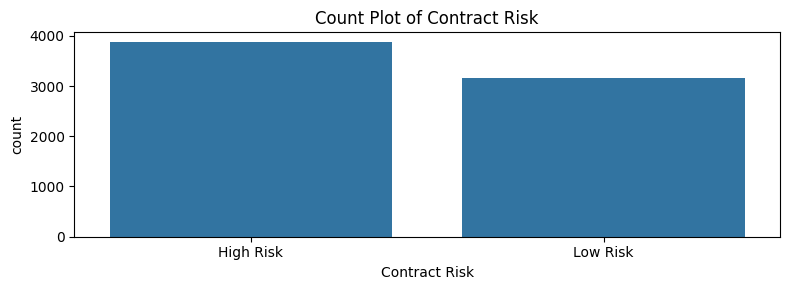

In [15]:
cat_cols = []
for col in df.columns:
    if not(col in numeric_df.columns):
        cat_cols.append(col)
for col in cat_cols:
    plt.figure(figsize=(8, 3))
    sns.countplot(data=df, x=col)
    plt.title(f'Count Plot of {col}')
    plt.tight_layout()
    plt.show()

##### **3. Correlation heatmaps**

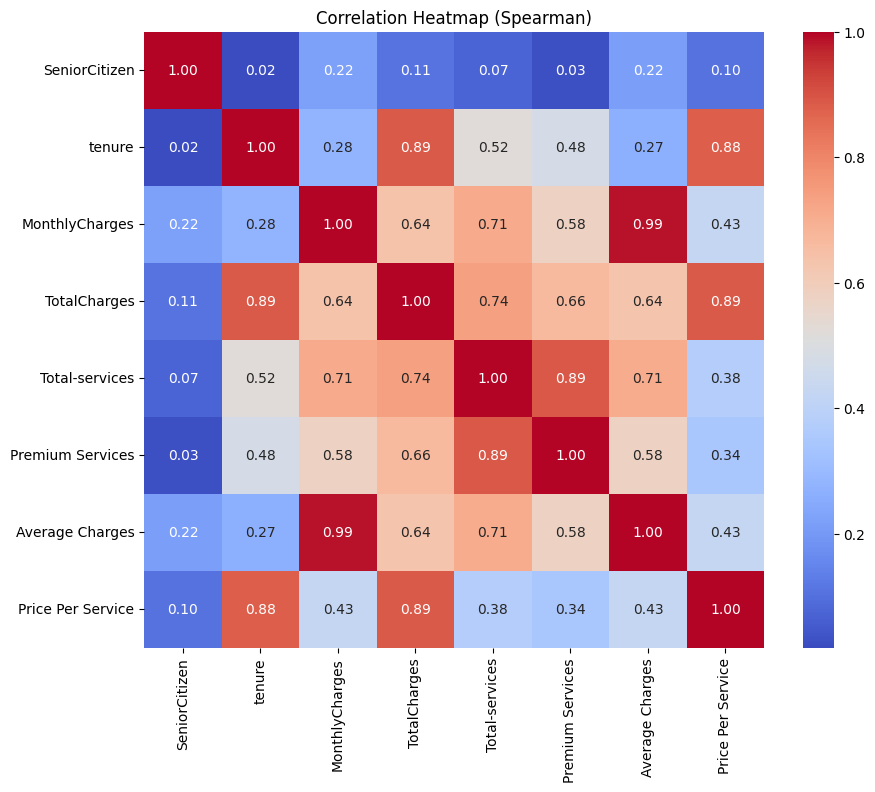

In [16]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap (Spearman)')
plt.show()

##### **4. Churn rate analysis by different segments**

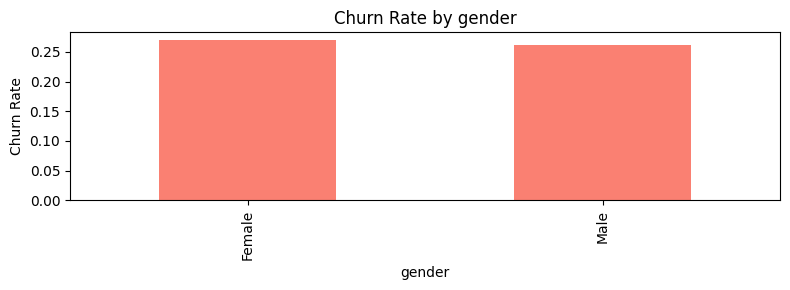

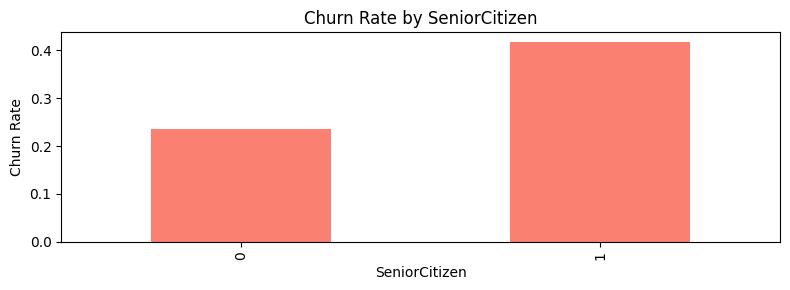

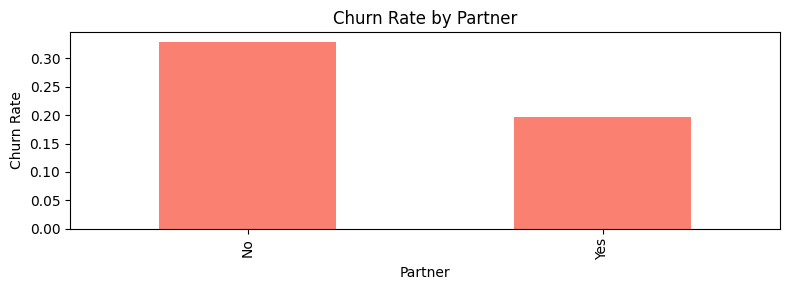

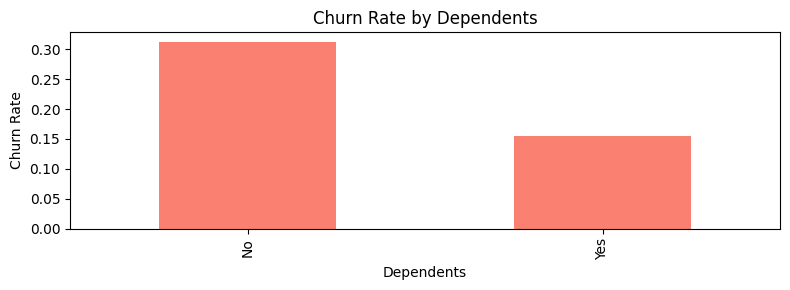

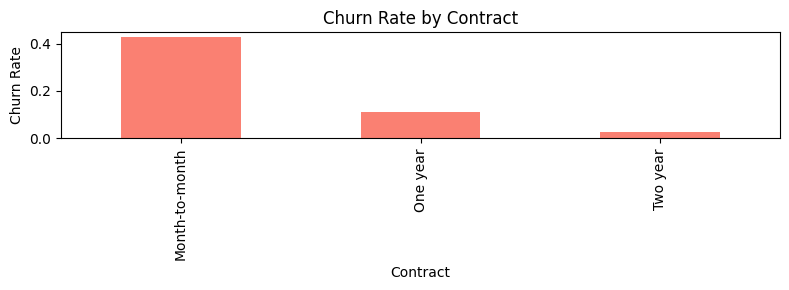

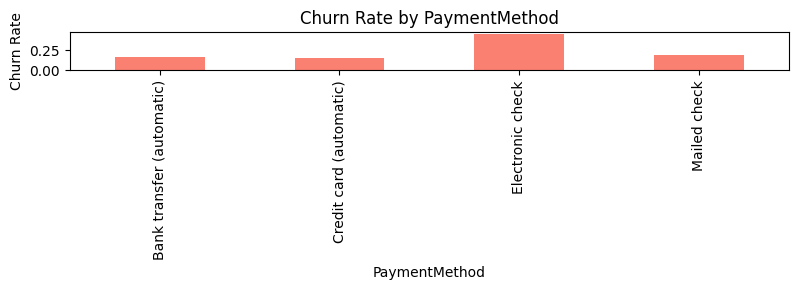

C:\Users\GIGABYTE\AppData\Local\Temp\ipykernel_8484\2055494878.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  churn_rate = df.groupby(seg)['Churn'].value_counts(normalize=True).unstack().get('Yes', pd.Series(0))


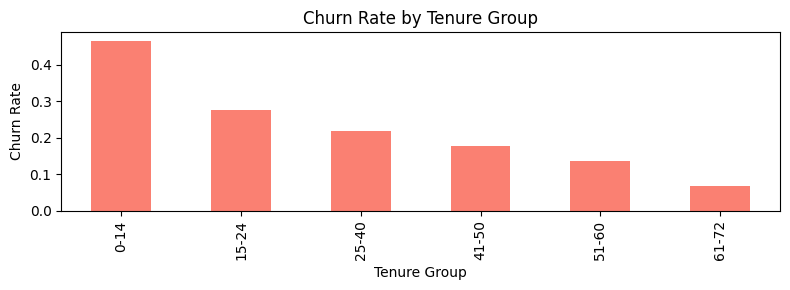

In [17]:
segment_cols = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'Contract', 'PaymentMethod', 'Tenure Group']
for seg in segment_cols:
    churn_rate = df.groupby(seg)['Churn'].value_counts(normalize=True).unstack().get('Yes', pd.Series(0))
    churn_rate.plot(kind='bar', color='salmon', figsize=(8, 3))
    plt.title(f'Churn Rate by {seg}')
    plt.ylabel('Churn Rate')
    plt.xlabel(seg)
    plt.tight_layout()
    plt.show()

## **3. Model Selection**

### **Task 3.1: Model Comparison Framework**

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X = pd.get_dummies(df.drop(columns=['Churn']), drop_first=True)
y = df['Churn'].map({'No': 0, 'Yes': 1})
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### **1. Logistic Regression**

In [20]:
from sklearn.linear_model import LogisticRegression

model_lg = LogisticRegression()

### **2. Decision Tree**

In [21]:
from sklearn.tree import DecisionTreeClassifier

model_dt = DecisionTreeClassifier(random_state=42)

### **3. Random Forest**

In [22]:
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier() 

### **4. XGBoost**

In [23]:
from xgboost import XGBClassifier

model_xgb = XGBClassifier(objective='binary:logistic',  
                          n_estimators=100,
                          learning_rate=0.1,
                          max_depth=3,
                          random_state=42)

### **5. Support Vector Machine(SVM)**

In [24]:
from sklearn.svm import SVC

model_svm = SVC(kernel='rbf',C=20, gamma='scale', random_state=42)

## **4. Model Training**

### **1. Logistic Regression**

In [25]:
model_lg.fit(X_train, y_train)
y_pred_lg = model_lg.predict(X_test)

c:\Users\GIGABYTE\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:470: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### **2. Decision Tree**

In [26]:
model_dt.fit(X_train, y_train)
y_pred_dt = model_dt.predict(X_test)

### **3. Random Forest**

In [27]:
model_rf.fit(X_train, y_train)
y_pred_rf = model_rf.predict(X_test)

### **4. XGBoost**

In [28]:
model_svm.fit(X_train, y_train)
y_pred_xgb = model_xgb.fit(X_train, y_train).predict(X_test)

### **5. Support Vector Machine(SVM)**

In [29]:
model_svm.fit(X_train, y_train)
y_pred_svm = model_svm.predict(X_test)

## 5. **Evaluation**

In [30]:
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, roc_curve, auc

### 1. **Logistic Regression**

Logistic Regression - Accuracy: 0.8035967818267865, F1 Score: 0.6013448607108549, Recall: 0.5452961672473867, Precision: 0.6702355460385439


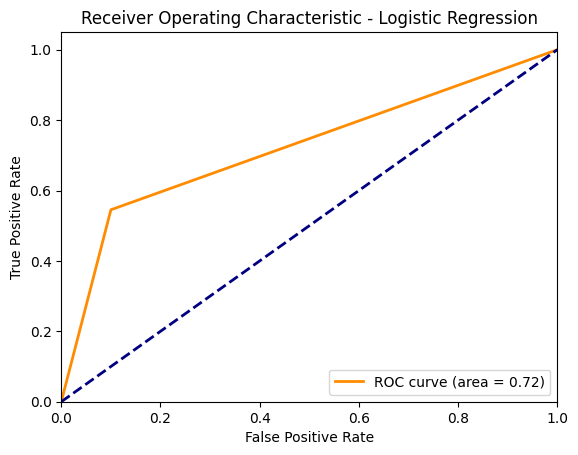

In [31]:
accuracy_lg = accuracy_score(y_test, y_pred_lg)
f1_lg = f1_score(y_test, y_pred_lg)
recall_lg = recall_score(y_test, y_pred_lg)
precision_lg = precision_score(y_test, y_pred_lg)

print(f"Logistic Regression - Accuracy: {accuracy_lg}, F1 Score: {f1_lg}, Recall: {recall_lg}, Precision: {precision_lg}")

fpr_lg, tpr_lg, thresholds_lg = roc_curve(y_test, y_pred_lg)
roc_auc = auc(fpr_lg, tpr_lg)
plt.figure()
plt.plot(fpr_lg, tpr_lg, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - Logistic Regression')
plt.legend(loc="lower right")
plt.show()

### 2. **Decision Tree**

Decision Tree - Accuracy: 0.7278750591575959, F1 Score: 0.4888888888888889, Recall: 0.47909407665505227, Precision: 0.49909255898366606


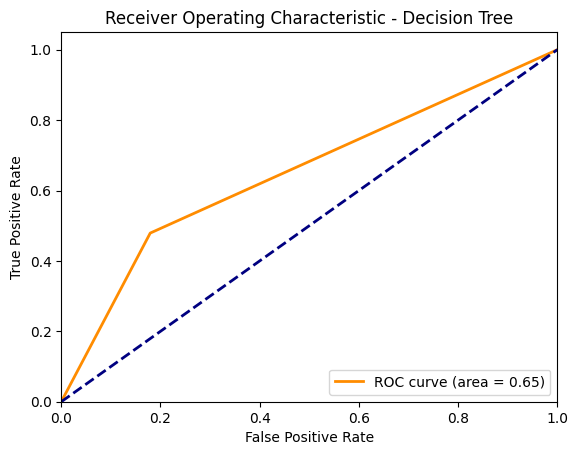

In [32]:
accuracy_dt = accuracy_score(y_test, y_pred_dt)
f1_dt = f1_score(y_test, y_pred_dt)
recall_dt = recall_score(y_test, y_pred_dt)
precision_dt = precision_score(y_test, y_pred_dt)

print(f"Decision Tree - Accuracy: {accuracy_dt}, F1 Score: {f1_dt}, Recall: {recall_dt}, Precision: {precision_dt}")

fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_test, y_pred_dt)
roc_auc_dt = auc(fpr_dt, tpr_dt)
plt.figure()
plt.plot(fpr_dt, tpr_dt, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_dt)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - Decision Tree')
plt.legend(loc="lower right")
plt.show()

### 3. **Random Forest**

Random Forest - Accuracy: 0.795551348793185, F1 Score: 0.560081466395112, Recall: 0.47909407665505227, Precision: 0.6740196078431373


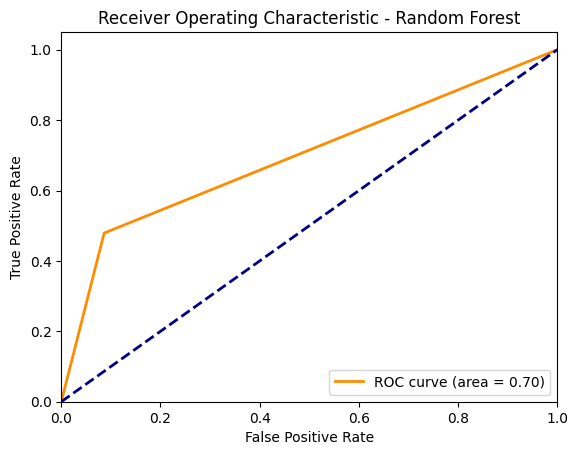

In [33]:
accuracy_rf = accuracy_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)

print(f"Random Forest - Accuracy: {accuracy_rf}, F1 Score: {f1_rf}, Recall: {recall_rf}, Precision: {precision_rf}")

fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_pred_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)
plt.figure()
plt.plot(fpr_rf, tpr_rf, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_rf)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - Random Forest')
plt.legend(loc="lower right")
plt.show()

### 4. **XGBoost**

XGBoost - Accuracy: 0.8026502602934217, F1 Score: 0.5875370919881305, Recall: 0.5174216027874564, Precision: 0.6796338672768879


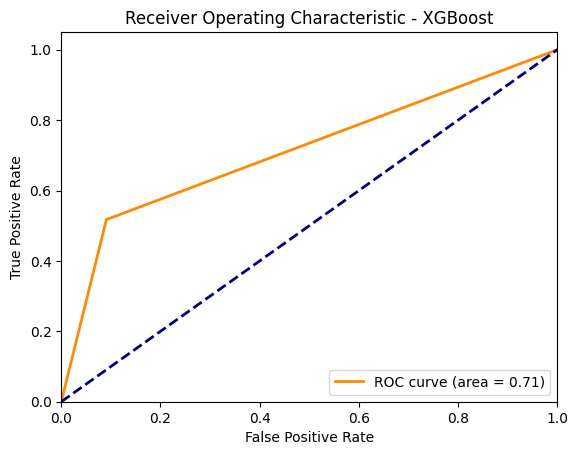

In [34]:
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
f1_xgb = f1_score(y_test, y_pred_xgb)
recall_xgb = recall_score(y_test, y_pred_xgb)
precision_xgb = precision_score(y_test, y_pred_xgb)

print(f"XGBoost - Accuracy: {accuracy_xgb}, F1 Score: {f1_xgb}, Recall: {recall_xgb}, Precision: {precision_xgb}")

fpr_xgb, tpr_xgb, thresholds_xgb = roc_curve(y_test, y_pred_xgb)
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)
plt.figure()
plt.plot(fpr_xgb, tpr_xgb, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_xgb)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - XGBoost')
plt.legend(loc="lower right")
plt.show()

### 5. **Support Vector Machine(SVM)**

SVM - Accuracy: 0.779460482725982, F1 Score: 0.44655581947743467, Recall: 0.32752613240418116, Precision: 0.7014925373134329


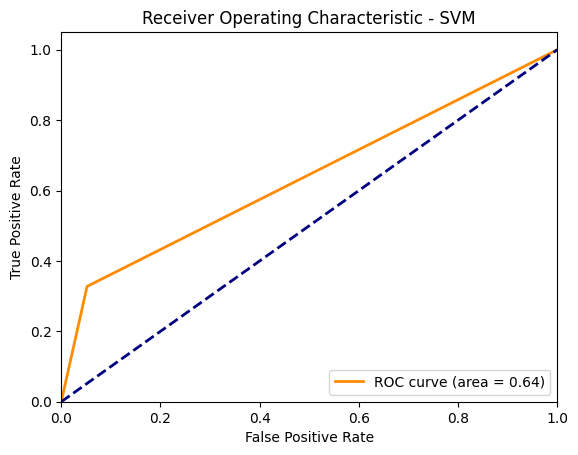

In [35]:
accuracy_svm = accuracy_score(y_test, y_pred_svm)
f1_svm = f1_score(y_test, y_pred_svm)
precision_svm = precision_score(y_test, y_pred_svm)
recall_svm = recall_score(y_test, y_pred_svm)

print(f"SVM - Accuracy: {accuracy_svm}, F1 Score: {f1_svm}, Recall: {recall_svm}, Precision: {precision_svm}")

fpr_svm, tpr_svm, thresholds_svm = roc_curve(y_test, y_pred_svm)
roc_auc_svm = auc(fpr_svm, tpr_svm)
plt.figure()
plt.plot(fpr_svm, tpr_svm, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_svm)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - SVM')
plt.legend(loc="lower right")
plt.show()

## 📘 **Overview**
This notebook presents an analysis of the **IBM Cognos Analytics Sample Data**, focusing on understanding customer demographics, services, and churn behavior.  
The main goal is to explore the dataset and prepare it for predictive modeling.

### **Key Features**
- **Demographic:** gender, SeniorCitizen, Partner, Dependents  
- **Service:** tenure, InternetService, OnlineSecurity, TechSupport, StreamingTV  
- **Account:** Contract, PaymentMethod, MonthlyCharges, TotalCharges  
- **Target:** Churn (Yes/No)

## 🧩 **Steps Performed**
1. **Data Cleaning**
   - Converted data types and handled missing values.
   - Filled `TotalCharges` nulls with median.
2. **EDA**
   - Visualized feature distributions.
   - Analyzed correlations and categorical effects on churn.
3. **Feature Engineering**
   - Encoded categorical variables.
   - Normalized numerical features.
4. **(Optional) Modeling**
   - Prepared data for ML model training and evaluation.

## 📈 **Insights**
- Customers with **month-to-month contracts** and **fiber optic internet** tend to churn more.
- Senior citizens and users with higher monthly charges show a higher churn probability.
- Longer-tenure customers and those with **security/backup services** are less likely to churn.

## 🧩 **Technologies Used**
- **Python**
- **Pandas**, **NumPy**
- **Matplotlib**, **Seaborn**, **Sklearn**

## ✅ **Conclusion**
This analysis helped reveal the main factors influencing customer churn.  
By understanding customer profiles and service patterns, businesses can:
- Improve **retention strategies** (e.g., targeted offers for high-risk customers),
- Optimize **service plans**, and
- Enhance **customer satisfaction**.

The prepared dataset is now ready for further modeling and prediction using algorithms like Logistic Regression, Decision Trees, or Random Forests.

---

📂 **Author:** David Khachatryan  
📅 **Project Type:** EDA Project